<a href="https://colab.research.google.com/github/f4iyaaz/diabetes_prediction/blob/main/Diabetes_Prediction_in_pregnant_women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# dataset = pd.read_csv('/content/drive/My Drive/CSE422 Lab Files/diabetes.csv')
dataset = pd.read_csv('./diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset['Outcome'].value_counts()
# 0 --> non-diabetic
# 1 --> diabetic

0    500
1    268
Name: Outcome, dtype: int64

**bar chart of outputs of class 0 and 1**

0    500
1    268
Name: Outcome, dtype: int64


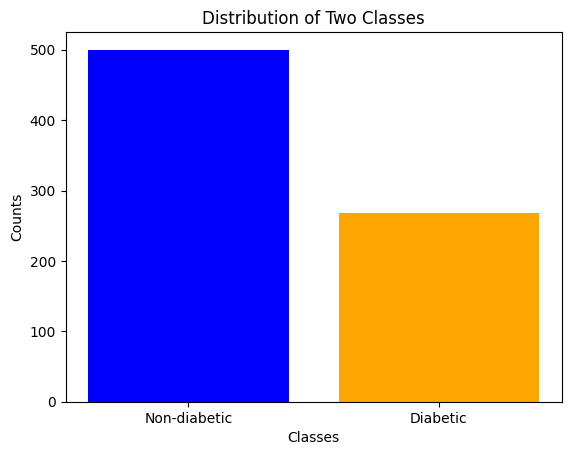

In [ ]:
print(dataset['Outcome'].value_counts())

import matplotlib.pyplot as plt

classes = ['Non-diabetic', 'Diabetic']
class_counts = [dataset['Outcome'].value_counts()[0], dataset['Outcome'].value_counts()[1]]

plt.bar(classes, class_counts, color=['blue', 'orange'])
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Distribution of Two Classes')
plt.show()

In [ ]:
# separating features and labels
X = dataset.drop(columns = 'Outcome', axis = 1)
Y = dataset['Outcome']

In [ ]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Correlation of All Features

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

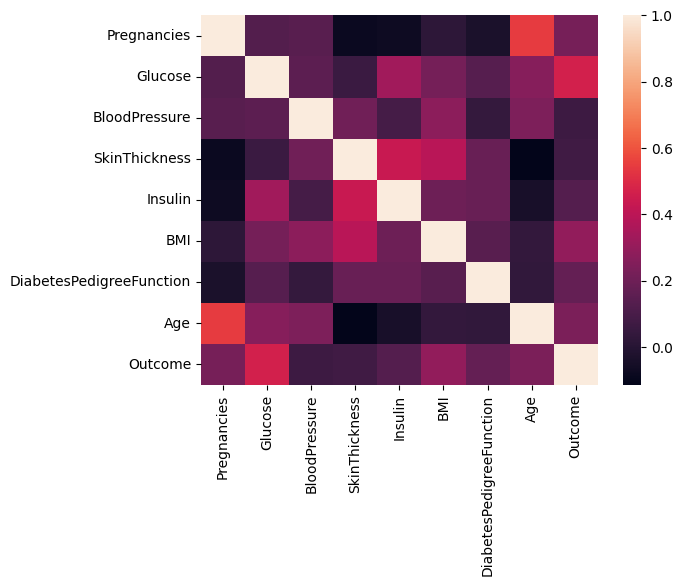

In [ ]:
import seaborn as sns
co = dataset.corr()
print(co)
sns.heatmap(co)

DATA PREPOCESSING

In [ ]:
# number of missing values in features

num_cols = [col for col in dataset.columns if dataset[col].dtypes != "O"]    # finding all columns with values of 0
print(num_cols)
num_cols_miss = [i for i in num_cols if i != "Pregnancies" and i != 'Outcome']  #excluding pregnancies and outcome column
# print(num_cols_miss)
for i in num_cols_miss:
    dataset[i] = dataset.apply(lambda x: np.nan if x[i] == 0 else x[i], axis=1)  # replacing values 0 with null value
dataset.isnull().sum()

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
def missing_values_table(dataframe, na_name=False):
    # only take missing value columns
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)  # number of missing value
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False) # ratio
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])  # make table
    print(missing_df, end="\n")

    if na_name:
        return na_columns

na_cols = missing_values_table(dataset, na_name=True)
# print(na_cols)
n_miss = dataset[na_cols].isnull().sum()
na_cols_ml = [i for i in n_miss.index if n_miss[i] < 100] # features with the number of missing values less than 100 goes to this list
na_cols_med = [i for i in n_miss.index if n_miss[i] > 100] # features with the number of missing values more than 100 goes to this list
print("Columns that will be applied ML model:", na_cols_ml)
print("Columns that will be filled with mean:", na_cols_med)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65
Columns that will be applied ML model: ['Glucose', 'BloodPressure', 'BMI']
Columns that will be filled with median: ['SkinThickness', 'Insulin']


In [ ]:
# before filling the missing values
dataset.head(77)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
72,13,126.0,90.0,NaN,NaN,43.4,0.583,42.0,1
73,4,129.0,86.0,20.0,270.0,35.1,0.231,23.0,0
74,1,79.0,75.0,30.0,NaN,32.0,0.396,22.0,0
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22.0,0


In [ ]:
# fills the missing values of 'Insulin' and 'SkinThickness' with median
dataset[na_cols_med] = dataset[na_cols_med].apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)

In [ ]:
# after filling the missing values with median
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30.0,0
6,3,78.0,50.0,32.00000,88.000000,31.0,0.248,26.0,1
7,10,115.0,NaN,29.15342,155.548223,35.3,0.134,29.0,0
8,2,197.0,70.0,45.00000,543.000000,30.5,0.158,53.0,1
9,8,125.0,96.0,29.15342,155.548223,NaN,0.232,54.0,1


In [ ]:
# We use KNN to impute missing values of 'Glucose', 'BloodPressure', 'BMI'.

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer


# Step 1: MinMax Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset[na_cols_ml])
dataset[na_cols_ml] = pd.DataFrame(scaled_data, columns=na_cols_ml)

print("Scaled Data:")
print(dataset[na_cols_ml].head())

# Step 2: Imputation using KNN
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(dataset[na_cols_ml])
dataset[na_cols_ml] = pd.DataFrame(imputed_data, columns=na_cols_ml)

print("Imputed Data:")
print(dataset[na_cols_ml].head())

# Step 3: Inverse Transform to Original Scale
original_data = scaler.inverse_transform(dataset[na_cols_ml])
dataset[na_cols_ml] = pd.DataFrame(original_data, columns=na_cols_ml)

print("Back to Original Scale:")
print(dataset[na_cols_ml].head())


Scaled Data:
    Glucose  BloodPressure       BMI
0  0.670968       0.489796  0.314928
1  0.264516       0.428571  0.171779
2  0.896774       0.408163  0.104294
3  0.290323       0.428571  0.202454
4  0.600000       0.163265  0.509202
Imputed Data:
    Glucose  BloodPressure       BMI
0  0.670968       0.489796  0.314928
1  0.264516       0.428571  0.171779
2  0.896774       0.408163  0.104294
3  0.290323       0.428571  0.202454
4  0.600000       0.163265  0.509202
Back to Original Scale:
   Glucose  BloodPressure   BMI
0    148.0           72.0  33.6
1     85.0           66.0  26.6
2    183.0           64.0  23.3
3     89.0           66.0  28.1
4    137.0           40.0  43.1


In [ ]:
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30.0,0
6,3,78.0,50.0,32.00000,88.000000,31.0,0.248,26.0,1
7,10,115.0,78.2,29.15342,155.548223,35.3,0.134,29.0,0
8,2,197.0,70.0,45.00000,543.000000,30.5,0.158,53.0,1
9,8,125.0,96.0,29.15342,155.548223,31.1,0.232,54.0,1


In [ ]:
# Number of missing values after the preprocessing
num_cols = [col for col in dataset.columns if dataset[col].dtypes != "O"]
num_cols_miss = [i for i in num_cols if i != "Pregnancies" and i != 'Outcome']
# print(num_cols_miss)
for i in num_cols_miss:
    dataset[i] = dataset.apply(lambda x: np.nan if x[i] == 0 else x[i], axis=1)
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Scaling


without scaling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state=0, stratify = Y)  # splitting of dataset
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.74


With StandardScaler

In [ ]:
# feature scaling is done to ensure all values of each features are within the same range to avoid biasness
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
knn.fit(X_train_scaled, y_train)

# testing accuracy on test set
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

KNN test accuracy: 0.73


with MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#train
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    knn.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.75


**Data Modelling and Testing**

Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
print("Training accuracy of the model is {:.2f}".format(gnb.score(X_train_scaled, y_train)))
print("Testing accuracy of the model is {:.2f}".format(gnb.score(X_test_scaled, y_test)))

Training accuracy of the model is 0.75
Testing accuracy of the model is 0.77


In [ ]:
predictions = gnb.predict(X_test_scaled)
print(predictions)

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0
 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[128  30]
 [ 22  51]]


<Axes: >

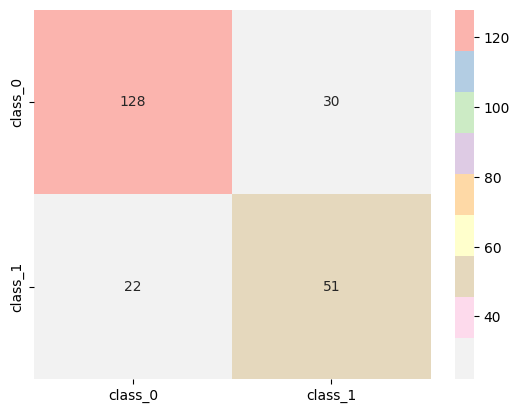

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True, fmt='g')

Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(X_test_scaled, y_test)))

Training accuracy of the model is 0.78
Testing accuracy of the model is 0.76


In [ ]:
predictions = svc.predict(X_test_scaled)
print(predictions)

[0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0]


In [ ]:
mat=confusion_matrix(predictions, y_test)
print(mat)

[[133  38]
 [ 17  43]]


<Axes: >

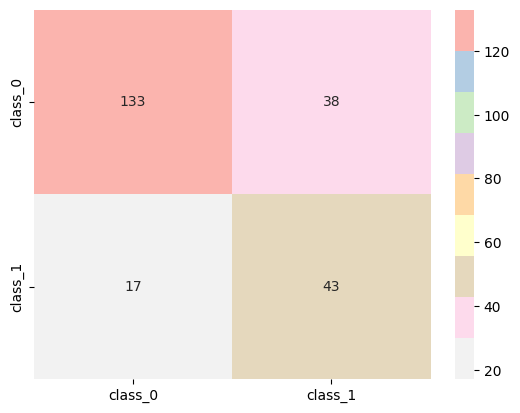

In [ ]:
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True, fmt='g')

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(X_train_scaled, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(X_test_scaled, y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.79


In [ ]:
predictions = rfc.predict(X_test_scaled)
print(predictions)

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0]


In [ ]:
mat=confusion_matrix(predictions, y_test)
print(mat)

[[132  31]
 [ 18  50]]


<Axes: >

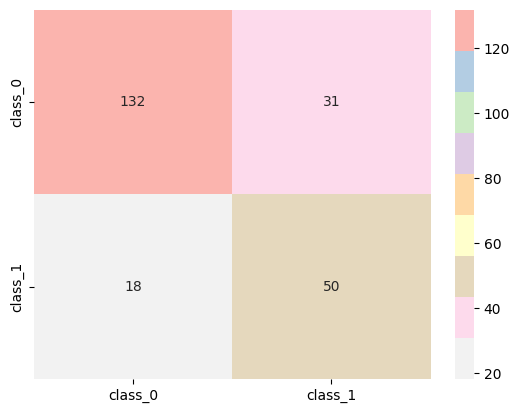

In [ ]:
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True, fmt='g')

Bar chart of prediction accuracy of the models

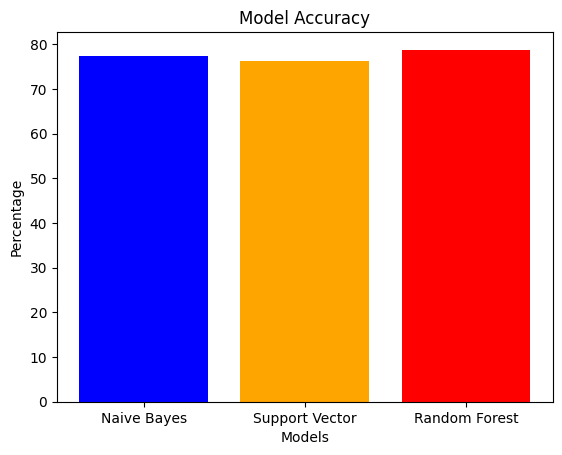

In [ ]:
classes = ['Naive Bayes', 'Support Vector', 'Random Forest']
class_counts = [gnb.score(X_test_scaled, y_test)*100, svc.score(X_test_scaled, y_test)*100, rfc.score(X_test_scaled, y_test)*100]

plt.bar(classes, class_counts, color=['blue', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.show()